In [1]:
# copying from the soultion of lab 2 --- this is for bonus tast but doing first
import numpy as np
import matplotlib.pyplot as plt

def projectile_trajectory(v0, theta,  g=9.8, time_of_flight=17, steps = 600):
    """
    Calculate the trajectory of a projectile.

    Parameters:
    v0 (float): Initial velocity in m/s.
    theta (float): Angle of projection in degrees.
    time_of_flight: in seconds 
    g (float): Acceleration due to gravity, default is 9.8 m/s^2.

    Returns:
    tuple: Two lists containing x_positions and y_positions.
    """
    theta_rad = np.radians(theta)  # Convert angle to radians
    #time_of_flight = (2 * v0 * np.sin(theta_rad)) / g  # Total time of flight - a smart way of doing this
    time_steps = np.linspace(0, time_of_flight, num=steps)  # Create a range of time values

    x_positions = []
    y_positions = []

    for t in time_steps:
        # Calculate x and y positions
        x = v0 * np.cos(theta_rad) * t
        y = v0 * np.sin(theta_rad) * t - 0.5 * g * t**2

        if y < 0:  # Stop appending if the projectile hits the ground
            #print('projectile hits the ground at time beyond', t, 'seconds')
            #break #this also works
            y = 0.0 # just make the projectile sit on the ground
        
        x_positions.append(x)
        y_positions.append(y)

    return x_positions, y_positions



# use of these functions to solve the question
v0 = 100  # Initial speed in m/s
theta = 45  # Angle of projection in degrees

x, y = projectile_trajectory(v0, theta)
# x and y are the trajectory of projectile


## Solution to the problem

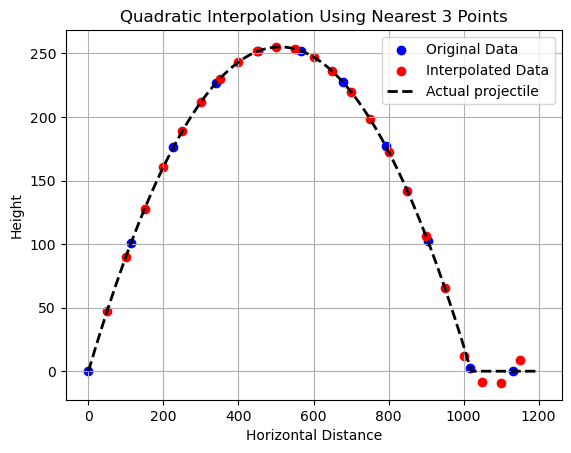

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# you don't need to import again but I am doing just to have everything in one cell

def quadratic_interpolation_nearest(x_data, y_data, x_interp):
    """
    Perform quadratic interpolation using the nearest 3 points for each interpolation point.

    Parameters:
    x_data (array-like): Given x-values (horizontal distances)
    y_data (array-like): Given y-values (heights)
    x_interp (array-like): Points where interpolation is needed

    Returns:
    np.ndarray: Interpolated y-values
    """
    y_interp = np.zeros(len(x_interp)) # creating initial array but you can also use an empty list i.e y_interp = []

    for i in range(len(x_interp)):
        # x value
        x = x_interp[i]
        
        # Find indices of the 3 closest points in x_data (using the hint given in the question)
        idx = np.argsort(np.abs(x_data - x))[:3]
        
        # Extract the nearest 3 points
        x0, x1, x2 = x_data[idx]
        y0, y1, y2 = y_data[idx]

        # Compute L0, L1, and L2 (note that these are called Lagrange basis polynomials)
        L0 = ((x - x1) * (x - x2)) / ((x0 - x1) * (x0 - x2))
        L1 = ((x - x0) * (x - x2)) / ((x1 - x0) * (x1 - x2))
        L2 = ((x - x0) * (x - x1)) / ((x2 - x0) * (x2 - x1))

        # Compute interpolated value
        y_interp[i] = y0 * L0 + y1 * L1 + y2 * L2
        # If you are using list then y_interp.append(y0 * L0 + y1 * L1 + y2 * L2) will be the code line above

    return y_interp


# Given data
height = np.array([0.0, 100.59, 176.1, 226.52, 251.84, 252.09, 227.24, 177.3, 102.28, 2.17, 0.0])
distance = np.array([0.0, 113.14, 226.27, 339.41, 452.55, 565.69, 678.82, 791.96, 905.1, 1018.23, 1131.37])

# Interpolation points
interp_dist = np.arange(50, 1200, 50)

# Compute interpolated values
interpolated_height = quadratic_interpolation_nearest(distance, height, interp_dist)

# Plot original data
plt.scatter(distance, height, color='blue', label='Original Data')

# Plot interpolated data
plt.scatter(interp_dist, interpolated_height, color='red', label='Interpolated Data')

# Plot the projectile trajectory using Lab 2 solutions (-- the bonus task)
plt.plot (x, y, linestyle='--', linewidth=2, color='k', label = 'Actual projectile')

# Plot grid
plt.grid('True')

plt.xlabel("Horizontal Distance")
plt.ylabel("Height")
plt.legend()
plt.title("Quadratic Interpolation Using Nearest 3 Points")
plt.show()


### Think: Why some red points going below zero and above after projectile hits the ground?